In [143]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

## Data Exploration

In [144]:
# Load data_orders table
data_orders = pd.read_csv('data_orders.csv')

In [145]:
data_orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [148]:
data_orders.shape

(10716, 8)

In [149]:
# Check for null values
data_orders.isna().sum()

order_datetime                      0
origin_longitude                    0
origin_latitude                     0
m_order_eta                      7902
order_gk                            0
order_status_key                    0
is_driver_assigned_key              0
cancellations_time_in_seconds    3409
dtype: int64

In [150]:
# Check for duplicates
data_orders.duplicated().sum()

0

## Dealing with NaN values

In [151]:
data_orders['order_status_key'].unique()

array([4, 9], dtype=int64)

In [152]:
data_orders_9 = data_orders[data_orders['order_status_key'] == 9]
data_orders_9['is_driver_assigned_key'].value_counts()

0    3406
1       3
Name: is_driver_assigned_key, dtype: int64

In [153]:
data_orders_4 = data_orders[data_orders['order_status_key'] == 4]
data_orders_4['is_driver_assigned_key'].value_counts()

0    4496
1    2811
Name: is_driver_assigned_key, dtype: int64

In [154]:
driver_assigned = data_orders[(data_orders['is_driver_assigned_key'] == 0) &(data_orders['order_status_key'] == 9)]

In [155]:
driver_assigned.shape

(3406, 8)

In [156]:
data_orders.fillna(0, inplace=True)

In [157]:
data_orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,0.0,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,0.0,3000583140877,9,0,0.0


## Building distribution of orders according to reasons for failure

In [158]:
# Groupping data by driver assgigned and order status
grouped_data_by_driver = data_orders.groupby(['is_driver_assigned_key', 'order_status_key']).size().unstack(fill_value=0)
grouped_data_by_driver

order_status_key,4,9
is_driver_assigned_key,,
0,4496,3406
1,2811,3


<Figure size 720x432 with 0 Axes>

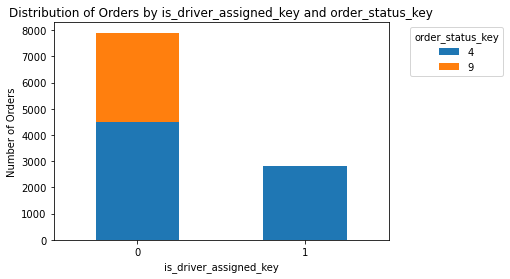

In [159]:
# Buildind a stacked bar 
plt.figure(figsize=(10, 6))
grouped_data_by_driver.plot(kind='bar', stacked=True)
plt.title('Distribution of Orders by is_driver_assigned_key and order_status_key')
plt.xlabel('is_driver_assigned_key')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.legend(title='order_status_key', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [160]:
data_orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,0.0,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,0.0,3000583140877,9,0,0.0


## Plotting the distribution of failed orders by hours

In [161]:
# Check data types
data_orders.dtypes

order_datetime                    object
origin_longitude                 float64
origin_latitude                  float64
m_order_eta                      float64
order_gk                           int64
order_status_key                   int64
is_driver_assigned_key             int64
cancellations_time_in_seconds    float64
dtype: object

In [162]:
data_orders['order_datetime'] = pd.to_datetime(data_orders['order_datetime'])
data_orders['order_hour'] = data_orders['order_datetime'].apply(lambda x: x.hour)

In [163]:
data_orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,order_hour
0,2024-05-09 18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,18
1,2024-05-09 20:57:32,-0.950385,51.456843,0.0,3000583116437,4,0,128.0,20
2,2024-05-09 12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,12
3,2024-05-09 13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0,13
4,2024-05-09 21:24:45,-0.967605,51.458236,0.0,3000583140877,9,0,0.0,21


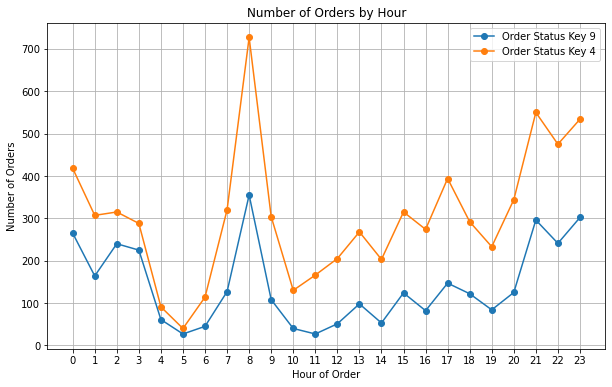

In [164]:
# Filter data for order_status_key = 9
data_orders_status_9 = data_orders[data_orders['order_status_key'] == 9]

# Grouping orders by hour and counting the number of orders for order_status_key = 9
status_9_counts = data_orders_status_9.groupby('order_hour').size()

# Filter data for order_status_key = 4
data_orders_status_4 = data_orders[data_orders['order_status_key'] == 4]

# Grouping orders by hour and counting the number of orders for order_status_key = 4
status_4_counts = data_orders_status_4.groupby('order_hour').size()

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(status_9_counts.index, status_9_counts.values, label='Order Status Key 9', marker='o')
plt.plot(status_4_counts.index, status_4_counts.values, label='Order Status Key 4', marker='o')
plt.title('Number of Orders by Hour')
plt.xlabel('Hour of Order')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid(True)
plt.xticks(range(24)) 
plt.show()

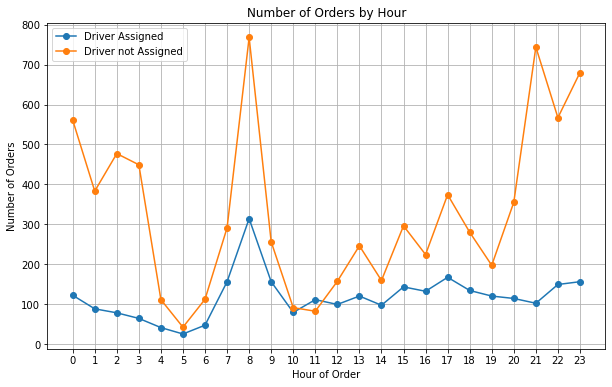

In [165]:
# Filter data for is_driver_assigned_key = 1 (Driver Assigned)
is_driver_assigned_key_1 = data_orders[data_orders['is_driver_assigned_key'] == 1]

# Grouping orders by hour and counting the number of orders for is_driver_assigned_key = 1
counts_driver_assigned = is_driver_assigned_key_1.groupby('order_hour').size()

# Filter data for is_driver_assigned_key = 0 (Driver not Assigned)
is_driver_assigned_key_0 = data_orders[data_orders['is_driver_assigned_key'] == 0]

# Grouping orders by hour and counting the number of orders for is_driver_assigned_key = 0
counts_driver_not_assigned = is_driver_assigned_key_0.groupby('order_hour').size()

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(counts_driver_assigned.index, counts_driver_assigned.values, label='Driver Assigned', marker='o')
plt.plot(counts_driver_not_assigned.index, counts_driver_not_assigned.values, label='Driver not Assigned', marker='o')
plt.title('Number of Orders by Hour')
plt.xlabel('Hour of Order')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid(True)
plt.xticks(range(24)) 
plt.show()

## Plotting the average time to cancellation with and without driver, by the hour

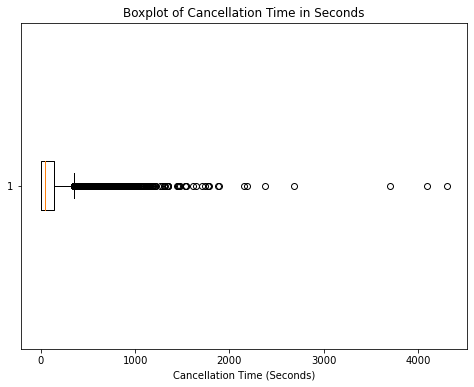

In [166]:
# Plotting a boxplot to chect outliers in the data
plt.figure(figsize=(8, 6))
plt.boxplot(data_orders['cancellations_time_in_seconds'], vert=False)
plt.title('Boxplot of Cancellation Time in Seconds')
plt.xlabel('Cancellation Time (Seconds)')
plt.show()

In [167]:
# Calculate the number of outliers
mean = data_orders['cancellations_time_in_seconds'].mean()
std_dev = data_orders['cancellations_time_in_seconds'].std()


threshold = 3

lower_bound = mean - threshold * std_dev
upper_bound = mean + threshold * std_dev

outliers_count = ((data_orders['cancellations_time_in_seconds'] < lower_bound) | (data_orders['cancellations_time_in_seconds'] > upper_bound)).sum()

print("Number of outliers:", outliers_count)

Number of outliers: 232


In [168]:
# Removing outliers
data_orders = data_orders[(data_orders['cancellations_time_in_seconds'] >= lower_bound) & (data_orders['cancellations_time_in_seconds'] <= upper_bound)]
data_orders.shape

(10484, 9)

In [169]:
data_orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,order_hour
0,2024-05-09 18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,18
1,2024-05-09 20:57:32,-0.950385,51.456843,0.0,3000583116437,4,0,128.0,20
2,2024-05-09 12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,12
3,2024-05-09 13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0,13
4,2024-05-09 21:24:45,-0.967605,51.458236,0.0,3000583140877,9,0,0.0,21


In [171]:
# Calculate average cancellation time for orders with driver by hour
avg_cancellation_time_with_driver = data_orders[data_orders['is_driver_assigned_key'] == 1]
                                                            .groupby('order_hour')['cancellations_time_in_seconds'].mean()

# Calculate average cancellation time for orders without driver by hour
avg_cancellation_time_without_driver = data_orders[data_orders['is_driver_assigned_key'] == 0]
                                                            .groupby('order_hour')['cancellations_time_in_seconds'].mean()

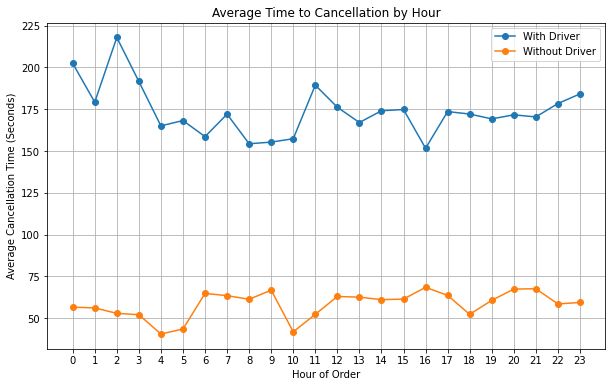

In [172]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(avg_cancellation_time_with_driver.index, avg_cancellation_time_with_driver.values, label='With Driver', marker='o')
plt.plot(avg_cancellation_time_without_driver.index, avg_cancellation_time_without_driver.values, label='Without Driver', marker='o')
plt.title('Average Time to Cancellation by Hour')
plt.xlabel('Hour of Order')
plt.ylabel('Average Cancellation Time (Seconds)')
plt.legend()
plt.grid(True)
plt.xticks(range(24))  # Set x-axis ticks to every hour
plt.show()

## Plot the distribution of average ETA by hours.

In [173]:
avg_eta_by_hour = data_orders.groupby('order_hour')['m_order_eta'].mean()

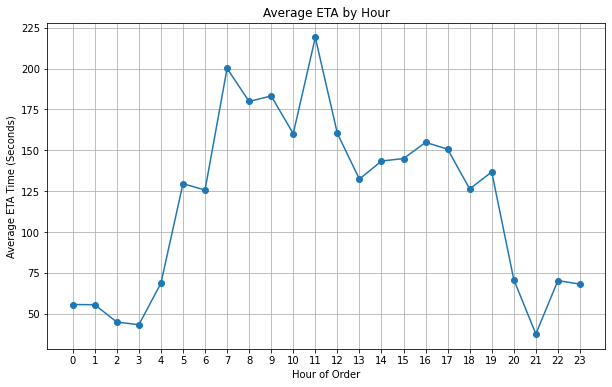

In [179]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(avg_eta_by_hour.index, avg_eta_by_hour.values, marker='o')
plt.title('Average ETA by Hour')
plt.xlabel('Hour of Order')
plt.ylabel('Average ETA Time (Seconds)')
plt.grid(True)
plt.xticks(range(24))  # Set x-axis ticks to every hour
plt.show()

In [177]:
import folium
import h3

# Convert latitude and longitude pairs to H3 hexagons
data_orders['hex_id'] = data_orders.apply(lambda row: h3.geo_to_h3(row['origin_latitude'], row['origin_longitude'], 8), axis=1)

# Count the number of orders in each hex
order_counts = data_orders['hex_id'].value_counts().reset_index()
order_counts.columns = ['hex_id', 'order_count']

# Sort hexes by the number of orders
order_counts = order_counts.sort_values(by='order_count', ascending=False)

# Calculate cumulative percentage of orders
order_counts['cumulative_percentage'] = order_counts['order_count'].cumsum() / order_counts['order_count'].sum()

# Determine the number of hexes needed to contain 80% of the orders
selected_hexes = order_counts[order_counts['cumulative_percentage'] <= 0.8]

# Visualize the hexes on a map
map_center = (data_orders['origin_latitude'].mean(), data_orders['origin_longitude'].mean())
mymap = folium.Map(location=map_center, zoom_start=10)

for index, row in selected_hexes.iterrows():
    hex_geometry = {'type': 'Polygon', 'coordinates': [h3.h3_to_geo_boundary(row['hex_id'], geo_json=True)]}
    folium.GeoJson(
        hex_geometry,
        style_function=lambda feature: {
            'fillColor': 'red',
            'color': 'black',
            'weight': 2,
            'fillOpacity': 0.5,
        }
    ).add_to(mymap)

# Save the map to an HTML file or display it
mymap.save("hex_map.html")